<a href="https://colab.research.google.com/github/Deeksha-Pandit/EVA4-S8/blob/master/FinalCode/MainCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
folder = '/content/gdrive/My Drive/Session7'
sys.path.append(folder)

In [0]:
%matplotlib inline
import torch
import train_test_data
import show_images
import my_model
import train_test
import evaluate

In [0]:
classes, trainloader, testloader = train_test_data.load()


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


plane   dog  deer  deer


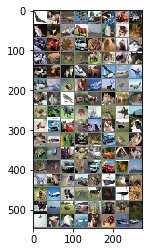

In [0]:
show_images.show_random_images(trainloader, classes)

In [0]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = my_model.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          18,432
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
        MaxPool2d-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.95,weight_decay=0.0004)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.1,total_steps=20)

In [0]:
EPOCHS = 30
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train_test.train(model, device, trainloader, optimizer, criterion, epoch)
    train_test.test(model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.7912803888320923 Batch_id=390 Accuracy=20.54: 100%|██████████| 391/391 [00:15<00:00, 26.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 1677/10000 (16.77%)

EPOCH: 2


Loss=1.7032239437103271 Batch_id=390 Accuracy=35.25: 100%|██████████| 391/391 [00:14<00:00, 26.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0161, Accuracy: 3061/10000 (30.61%)

EPOCH: 3


Loss=1.1931040287017822 Batch_id=390 Accuracy=47.70: 100%|██████████| 391/391 [00:14<00:00, 26.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0131, Accuracy: 4094/10000 (40.94%)

EPOCH: 4


Loss=1.1537526845932007 Batch_id=390 Accuracy=54.53: 100%|██████████| 391/391 [00:14<00:00, 26.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 5054/10000 (50.54%)

EPOCH: 5


Loss=1.0190060138702393 Batch_id=390 Accuracy=58.75: 100%|██████████| 391/391 [00:14<00:00, 28.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 5012/10000 (50.12%)

EPOCH: 6


Loss=0.9446093440055847 Batch_id=390 Accuracy=61.61: 100%|██████████| 391/391 [00:14<00:00, 26.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0103, Accuracy: 5431/10000 (54.31%)

EPOCH: 7


Loss=0.7459450364112854 Batch_id=390 Accuracy=64.28: 100%|██████████| 391/391 [00:14<00:00, 26.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 5514/10000 (55.14%)

EPOCH: 8


Loss=0.8027777671813965 Batch_id=390 Accuracy=66.75: 100%|██████████| 391/391 [00:15<00:00, 25.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 6100/10000 (61.00%)

EPOCH: 9


Loss=0.745631992816925 Batch_id=390 Accuracy=68.10: 100%|██████████| 391/391 [00:15<00:00, 26.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 6188/10000 (61.88%)

EPOCH: 10


Loss=0.7607129812240601 Batch_id=390 Accuracy=69.75: 100%|██████████| 391/391 [00:14<00:00, 26.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 6545/10000 (65.45%)

EPOCH: 11


Loss=0.9396888613700867 Batch_id=390 Accuracy=70.93: 100%|██████████| 391/391 [00:14<00:00, 26.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 6511/10000 (65.11%)

EPOCH: 12


Loss=0.6462812423706055 Batch_id=390 Accuracy=72.19: 100%|██████████| 391/391 [00:14<00:00, 26.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 6472/10000 (64.72%)

EPOCH: 13


Loss=0.6012436151504517 Batch_id=390 Accuracy=73.06: 100%|██████████| 391/391 [00:14<00:00, 26.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 6822/10000 (68.22%)

EPOCH: 14


Loss=0.9389138221740723 Batch_id=390 Accuracy=73.99: 100%|██████████| 391/391 [00:14<00:00, 26.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 6878/10000 (68.78%)

EPOCH: 15


Loss=0.6204823851585388 Batch_id=390 Accuracy=74.72: 100%|██████████| 391/391 [00:14<00:00, 26.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 7115/10000 (71.15%)

EPOCH: 16


Loss=0.7475767135620117 Batch_id=390 Accuracy=75.06: 100%|██████████| 391/391 [00:14<00:00, 26.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7119/10000 (71.19%)

EPOCH: 17


Loss=0.9051578640937805 Batch_id=390 Accuracy=76.08: 100%|██████████| 391/391 [00:14<00:00, 26.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7293/10000 (72.93%)

EPOCH: 18


Loss=0.6333185434341431 Batch_id=390 Accuracy=76.38: 100%|██████████| 391/391 [00:14<00:00, 26.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7304/10000 (73.04%)

EPOCH: 19


Loss=0.752400815486908 Batch_id=390 Accuracy=76.91: 100%|██████████| 391/391 [00:14<00:00, 26.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7387/10000 (73.87%)

EPOCH: 20


Loss=0.7211261987686157 Batch_id=390 Accuracy=77.65: 100%|██████████| 391/391 [00:14<00:00, 26.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7467/10000 (74.67%)

EPOCH: 21


Loss=0.8302639722824097 Batch_id=390 Accuracy=78.06: 100%|██████████| 391/391 [00:14<00:00, 26.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7458/10000 (74.58%)

EPOCH: 22


Loss=0.38740235567092896 Batch_id=390 Accuracy=78.35: 100%|██████████| 391/391 [00:14<00:00, 26.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7514/10000 (75.14%)

EPOCH: 23


Loss=0.49886494874954224 Batch_id=390 Accuracy=78.97: 100%|██████████| 391/391 [00:14<00:00, 26.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7509/10000 (75.09%)

EPOCH: 24


Loss=0.6444870829582214 Batch_id=390 Accuracy=79.22: 100%|██████████| 391/391 [00:14<00:00, 26.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7434/10000 (74.34%)

EPOCH: 25


Loss=0.6754608154296875 Batch_id=390 Accuracy=79.62: 100%|██████████| 391/391 [00:14<00:00, 26.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7524/10000 (75.24%)

EPOCH: 26


Loss=0.5634399652481079 Batch_id=390 Accuracy=80.20: 100%|██████████| 391/391 [00:15<00:00, 26.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7649/10000 (76.49%)

EPOCH: 27


Loss=0.585507869720459 Batch_id=390 Accuracy=80.47: 100%|██████████| 391/391 [00:14<00:00, 26.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7788/10000 (77.88%)

EPOCH: 28


Loss=0.6720081567764282 Batch_id=390 Accuracy=80.89: 100%|██████████| 391/391 [00:14<00:00, 26.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7777/10000 (77.77%)

EPOCH: 29


Loss=0.5516061782836914 Batch_id=390 Accuracy=80.90: 100%|██████████| 391/391 [00:14<00:00, 26.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7753/10000 (77.53%)

EPOCH: 30


Loss=0.2969677746295929 Batch_id=390 Accuracy=81.39: 100%|██████████| 391/391 [00:14<00:00, 26.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7862/10000 (78.62%)

EPOCH: 31


Loss=0.5075808167457581 Batch_id=390 Accuracy=81.93: 100%|██████████| 391/391 [00:14<00:00, 26.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7685/10000 (76.85%)

EPOCH: 32


Loss=0.6423543691635132 Batch_id=390 Accuracy=82.01: 100%|██████████| 391/391 [00:14<00:00, 26.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7804/10000 (78.04%)

EPOCH: 33


Loss=0.5864452123641968 Batch_id=390 Accuracy=82.22: 100%|██████████| 391/391 [00:14<00:00, 26.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7861/10000 (78.61%)

EPOCH: 34


Loss=0.5090051293373108 Batch_id=390 Accuracy=82.49: 100%|██████████| 391/391 [00:14<00:00, 26.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7897/10000 (78.97%)

EPOCH: 35


Loss=0.48332542181015015 Batch_id=390 Accuracy=82.90: 100%|██████████| 391/391 [00:14<00:00, 26.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7790/10000 (77.90%)

EPOCH: 36


Loss=0.6408131122589111 Batch_id=390 Accuracy=82.93: 100%|██████████| 391/391 [00:14<00:00, 26.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7936/10000 (79.36%)

EPOCH: 37


Loss=0.46075552701950073 Batch_id=390 Accuracy=83.32: 100%|██████████| 391/391 [00:14<00:00, 26.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7829/10000 (78.29%)

EPOCH: 38


Loss=0.5357597470283508 Batch_id=390 Accuracy=83.50: 100%|██████████| 391/391 [00:14<00:00, 26.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7856/10000 (78.56%)

EPOCH: 39


Loss=0.4196026921272278 Batch_id=390 Accuracy=83.77: 100%|██████████| 391/391 [00:14<00:00, 26.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7979/10000 (79.79%)

EPOCH: 40


Loss=0.5944347977638245 Batch_id=390 Accuracy=83.84: 100%|██████████| 391/391 [00:14<00:00, 26.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7907/10000 (79.07%)

EPOCH: 41


Loss=0.5364861488342285 Batch_id=390 Accuracy=84.33: 100%|██████████| 391/391 [00:14<00:00, 26.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7928/10000 (79.28%)

EPOCH: 42


Loss=0.39259228110313416 Batch_id=390 Accuracy=84.36: 100%|██████████| 391/391 [00:14<00:00, 26.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 8018/10000 (80.18%)

EPOCH: 43


Loss=0.6330055594444275 Batch_id=390 Accuracy=84.45: 100%|██████████| 391/391 [00:14<00:00, 26.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8011/10000 (80.11%)

EPOCH: 44


Loss=0.46903523802757263 Batch_id=390 Accuracy=84.91: 100%|██████████| 391/391 [00:14<00:00, 26.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 8024/10000 (80.24%)

EPOCH: 45


Loss=0.47327035665512085 Batch_id=390 Accuracy=84.80: 100%|██████████| 391/391 [00:14<00:00, 26.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8085/10000 (80.85%)

EPOCH: 46


Loss=0.25874876976013184 Batch_id=390 Accuracy=85.10: 100%|██████████| 391/391 [00:14<00:00, 26.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7961/10000 (79.61%)

EPOCH: 47


Loss=0.4605655074119568 Batch_id=390 Accuracy=85.39: 100%|██████████| 391/391 [00:14<00:00, 26.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8062/10000 (80.62%)

EPOCH: 48


Loss=0.3245459496974945 Batch_id=390 Accuracy=85.56: 100%|██████████| 391/391 [00:14<00:00, 26.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 8019/10000 (80.19%)

EPOCH: 49


Loss=0.43709230422973633 Batch_id=390 Accuracy=85.70: 100%|██████████| 391/391 [00:14<00:00, 26.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8140/10000 (81.40%)

EPOCH: 50


Loss=0.4516761302947998 Batch_id=390 Accuracy=85.91: 100%|██████████| 391/391 [00:14<00:00, 26.54it/s]



Test set: Average loss: 0.0053, Accuracy: 8010/10000 (80.10%)



GroundTruth:  horse truck horse  frog
Predicted:    cat   car horse  frog


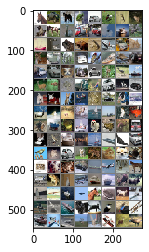

In [0]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [0]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 80.100 %


In [0]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 91 %
Accuracy of   car : 76 %
Accuracy of  bird : 56 %
Accuracy of   cat : 83 %
Accuracy of  deer : 87 %
Accuracy of   dog : 60 %
Accuracy of  frog : 74 %
Accuracy of horse : 81 %
Accuracy of  ship : 86 %
Accuracy of truck : 87 %
